# __Modelo de función: regresión lineal múltiple__

In [ ]:
#Apretar B para agregar una celda abajo, A para agregar una celda arriba, y D dos veces consecutivas para eliminar una celda.

In [3]:
#Librería de C++ que resuelve Cuadrados Mínimos Lineales, y además provee RMSE y NRMSE
import CML
#Para crear matrices e interfacear con Eigen en C++
import numpy as np
#Para hacer los gráficos
import matplotlib.pyplot as plt
#Para crear dataframes y almacenar los datos.
import pandas as pd
#Para cargar los datos desde archivos de texto
import pickle

In [4]:
%%time
#Leo archivos .csv
df1994 = pd.read_csv('../data/1994.csv')
df1993 = pd.read_csv('../data/1993.csv')
df1992 = pd.read_csv('../data/1992.csv')

print("Columnas:\n",list(df1993))

#Creo una nueva columna que corresponde al día del año ([1,365])
df1994['Day']=df1994['DayofMonth']
df1993['Day']=df1993['DayofMonth']
df1992['Day']=df1992['DayofMonth']

A = pd.to_datetime(df1994[['Year','Month','Day']])
df1994['Day']=A.dt.dayofyear

A = pd.to_datetime(df1993[['Year','Month','Day']])
df1993['Day']=A.dt.dayofyear

A = pd.to_datetime(df1992[['Year','Month','Day']])
df1992['Day']=A.dt.dayofyear

Columnas:
 ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
CPU times: user 49.3 s, sys: 16 s, total: 1min 5s
Wall time: 1min 9s


In [110]:
prim = 250
ys = np.array(df1993["DepDelay"].tolist()[:prim])
ms = np.array(df1993["Month"].tolist()[:prim])[np.logical_not(np.isnan(ys))]
print(ms.shape)
ds = np.array(df1993["DayOfWeek"].tolist()[:prim])[np.logical_not(np.isnan(ys))]
print(ds.shape)
hs = np.array(df1993["CRSDepTime"].tolist()[:prim])[np.logical_not(np.isnan(ys))]
print(hs.shape)

ys = ys[np.logical_not(np.isnan(ys))]
print(ys.shape)


(249,)
(249,)
(249,)
(249,)


In [4]:
#Cargo los OTPs diarios para cada año relevante
with open('otpPorDia1990.txt', 'rb') as f:
    otpDia90 = pickle.load(f)
with open('otpPorDia1991.txt', 'rb') as f:
    otpDia91 = pickle.load(f)
with open('otpPorDia1992.txt', 'rb') as f:
    otpDia92 = pickle.load(f)
with open('otpPorDia1993.txt', 'rb') as f:
    otpDia93 = pickle.load(f)
with open('otpPorDia1994.txt', 'rb') as f:
    otpDia94 = pickle.load(f)
with open('otpPorDia1995.txt', 'rb') as f:
    otpDia95 = pickle.load(f)
with open('otpPorDia1996.txt', 'rb') as f:
    otpDia96 = pickle.load(f)
with open('otpPorDia2001.txt', 'rb') as f:
    otpDia01 = pickle.load(f)
with open('otpPorDia2002.txt', 'rb') as f:
    otpDia02 = pickle.load(f)
with open('otpPorDia2003.txt', 'rb') as f:
    otpDia03 = pickle.load(f)
with open('otpPorDia2004.txt', 'rb') as f:
    otpDia04 = pickle.load(f)
with open('otpPorDia2005.txt', 'rb') as f:
    otpDia05 = pickle.load(f)
with open('otpPorDia2006.txt', 'rb') as f:
    otpDia06 = pickle.load(f)
with open('otpPorDia2007.txt', 'rb') as f:
    otpDia07 = pickle.load(f)
with open('otpPorDia2008.txt', 'rb') as f:
    otpDia08 = pickle.load(f)

In [114]:
%%time
#Variables que vamos a considerar: 'Month', 'DayOfWeek', 'CRSDepTime'
#Más tarde, hay que agregar 'UniqueCarrier', 'Origin', 'Year'
#Modelo de función: f(m,d,h) = cos(0) + sin(0) + cos(2*pi/12*m) + sin(2*pi/12*m) + cos(2*pi/6*m) + sin(2*pi/6*m) + cos(2*pi/4*m) + sin(2*pi/4*m) + cos(2*pi/3*m) + sin(2*pi/3*m) + cos(2*pi*5/12*m) + sin(2*pi*5/12*m) + 
#                            + cos(0) + sin(0) + cos(2*pi/7*d) + sin(2*pi/7*d) + cos(2*pi*2/7*d) + sin(2*pi*2/7*d) + cos(2*pi*3/7*d) + sin(2*pi*3/7*d) +
#                            + cos(0) + sin(0) + cos(2*pi/24*h) + sin(2*pi/24*h) + cos(2*pi*2/24*h) + sin(2*pi*2/24*h) + cos(2*pi*3/24*h) + sin(2*pi*3/24*h) + cos(2*pi*4/24*h) + sin(2*pi*4/24*h) + cos(2*pi*5/24*h) + sin(2*pi*5/24*h) + cos(2*pi*6/24*h) + sin(2*pi*6/24*h) + cos(2*pi*7/24*h) + sin(2*pi*7/24*h) + cos(2*pi*8/24*h) + sin(2*pi*8/24*h) + cos(2*pi*9/24*h) + sin(2*pi*9/24*h) + cos(2*pi*10/24*h) + sin(2*pi*10/24*h) + cos(2*pi*11/24*h) + sin(2*pi*11/24*h)

#A = np.stack([np.cos(2*np.pi*i/12*ms) for i in range(6)]+[np.sin(2*np.pi*i/12*ms) for i in range(6)]+[np.cos(2*np.pi*i/7*ds) for i in range(4)]+[np.sin(2*np.pi*i/7*ds) for i in range(4)]+[np.cos(2*np.pi*i/24*hs) for i in range(12)]+[np.sin(2*np.pi*i/24*hs) for i in range(12)]+[np.ones(len(ms)),ms,ds,hs], axis=1)
#A = np.stack([np.ones(len(ms)),ms,ds,hs,np.cos(2*np.pi/12*ms),np.sin(2*np.pi/12*ms),np.cos(2*np.pi/7*ds),np.sin(2*np.pi/7*ds),np.cos(2*np.pi/24*hs),np.sin(2*np.pi/24*hs),],axis=1)
#Resolver CML
sol = CML.resolver(A,ys)
#print("\tCoeficientes solución:", sol)
print(A.shape,sol.shape)
#Calculo NRMSE
error = CML.RMSE(A,sol,ys)
errorN = CML.NRMSE(A,sol,ys)
print(error,errorN)

(249, 4) (4,)
14.080095893390602 0.1513988805740925
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 957 µs


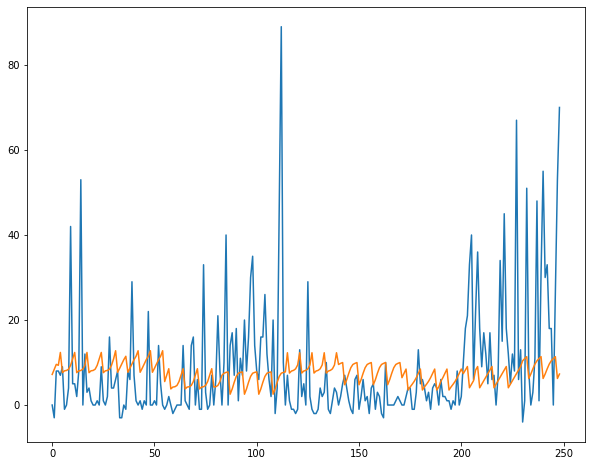

In [115]:
plt.figure(figsize=(10,8))
plt.plot(ys,label="datos")

aprox = A@sol

plt.plot(aprox, label = 'Aproximación')